In [17]:
# imports
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

In [ ]:

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for Data Scientist roles in US

In [13]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')]

Text(0.5, 0, '')

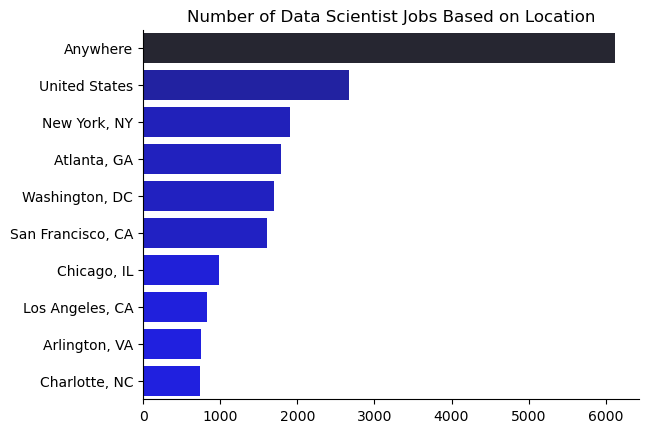

In [ ]:
## Filter Based on Location
df_plot = df_DS_US['job_location'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot, x='count', y='job_location' ,hue="count", palette='dark:b_r',legend=False )
sns.despine()
plt.title('Number of Data Scientist Jobs Based on Location')
plt.ylabel('')
plt.xlabel('')


Text(0.5, 0.98, 'Job Benefits for Data Scientist Roles in the US')

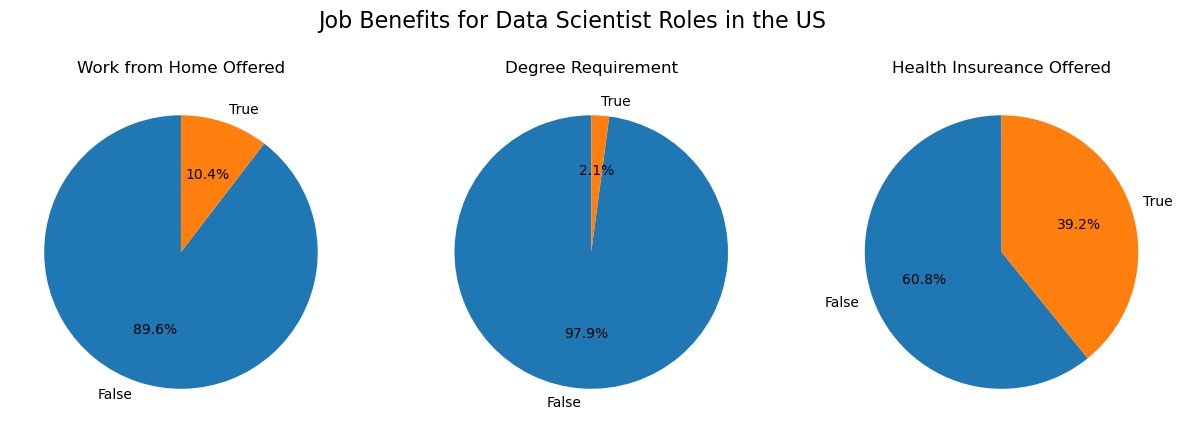

In [ ]:
## Based on Benefits
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance':'Health Insureance Offered'

}
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)

for i, (col, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DS_US[col].value_counts(), labels = ['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.suptitle('Job Benefits for Data Scientist Roles in the US', fontsize=16)
plt.show()

Text(0.5, 0, '')

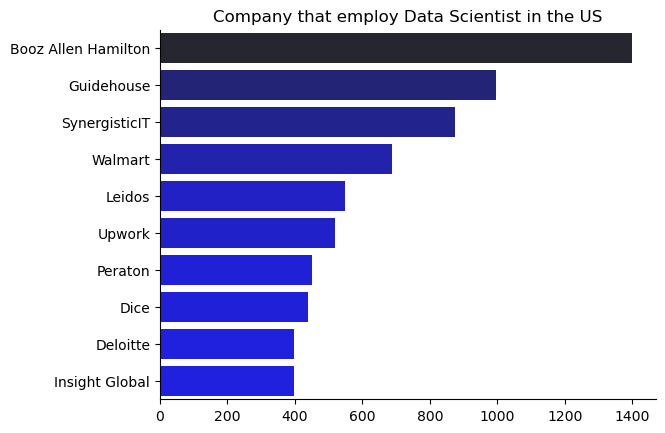

In [60]:
## Based on  Company
df_plot = df_DS_US['company_name'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot, x='count', y='company_name' ,hue="count", palette='dark:b_r',legend=False )
sns.despine()
plt.title('Company that employ Data Scientist in the US')
plt.ylabel('')
plt.xlabel('')